In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel("C:\\Users\\ecull\\OneDrive\\Documents\\Frimpong_sales\\sales_data.xlsx")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.shape

(2823, 25)

In [5]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

There are null values in some of the columns related to the delivery address, however there is no null values regarding orders, products or delivery status, therefore every order recorded is fully accounted for in terms of the essential information that is required.

Therefore, I will not make any changes to any columns/rows due to any null values.

In [6]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Order date is listed as an object. I want to change it to a datetime datatype for my analysis.

All order times were recroded at 00:00. Therefore, removed time and just have the calender date in the orderdate column. 

In [7]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [8]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

        Find distribution of order status

In [9]:
df['STATUS'].value_counts(normalize=True).to_frame('Status (%)').round(4)*100

,Status (%)
Shipped,92.70
Cancelled,2.13
Resolved,1.66
On Hold,1.56
In Process,1.45
Disputed,0.50


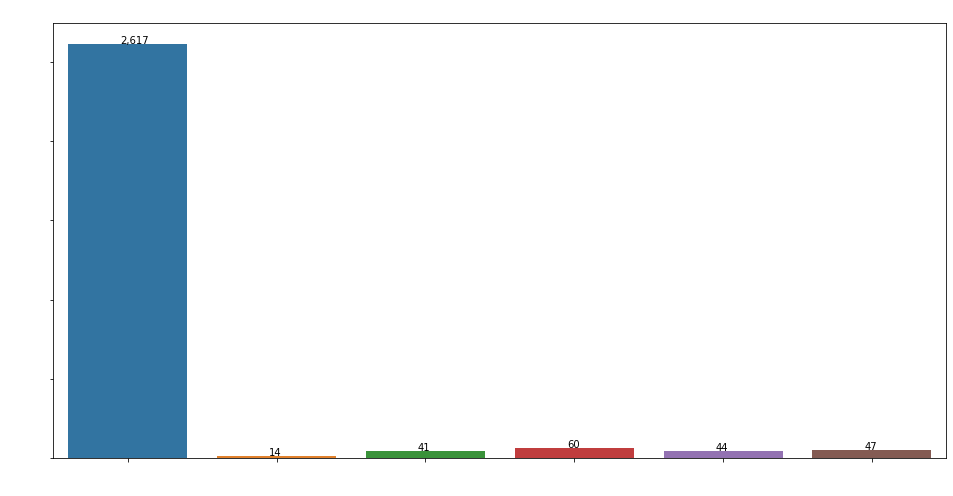

In [27]:
plt.figure(figsize=(16,8))

ax = sns.countplot(data=df, x='STATUS')

ax.set_title("Distribution of Order Status", color='w')
for p in ax.patches:
   ax.annotate('{0:,.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1), color='black')

plt.xticks(color='w')
plt.yticks(color='w')
plt.xlabel('Status', color='w')
plt.ylabel('Count', color='w')
plt.show()

          Find month with highest sales in each individual year

Firstly want to change the month_id column from numbers to the month names.

In [11]:
df['MONTH_ID'] = df['MONTH_ID'].replace({
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sept',
    10:'Oct',
    11:'Nov',
    12:'Dec'
})

In [12]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
df['MONTH_ID'] = pd.Categorical(df['MONTH_ID'], categories=months, ordered=True)

In [13]:
df2003 = df[df['YEAR_ID'] == 2003]
df2004 = df[df['YEAR_ID'] == 2004]
df2005 = df[df['YEAR_ID'] == 2005]

In [14]:
sales2003 = df2003[['YEAR_ID','MONTH_ID','SALES']].groupby(['YEAR_ID','MONTH_ID']).sum().sort_values(by='SALES', ascending=False).style.format('${0:,.2f}')
sales2003

In [15]:
sales2004 = df2004[['YEAR_ID','MONTH_ID','SALES']].groupby(['YEAR_ID','MONTH_ID']).sum().sort_values(by='SALES', ascending=False).style.format('${0:,.2f}')
sales2004

In [16]:
sales2005 = df2005[['YEAR_ID','MONTH_ID','SALES']].groupby(['YEAR_ID','MONTH_ID']).sum().sort_values(by='SALES', ascending=False).style.format('${0:,.2f}')
sales2005

As shown from tables above, the months with the highest revenue for each year are:

- 2003 = November ($1,029,837.66)
- 2004 = November ($1,089,048.01)
- 2005 = May ($457,861.06)**

** Don't have data for full calender year

         Distribution of orders by country

In [17]:
country_order_count = df[['COUNTRY', 'ORDERNUMBER']].groupby(['COUNTRY']).count().sort_values(by='ORDERNUMBER', ascending=False).reset_index()

country_order_count.index = np.arange(1,len(country_order_count)+1)

country_order_count


,COUNTRY,ORDERNUMBER
1,USA,1004
2,Spain,342
3,France,314
4,Australia,185
5,UK,144
6,Italy,113
7,Finland,92
8,Norway,85
9,Singapore,79
10,Canada,70


In [18]:
country_percentage_orders = df['COUNTRY'].value_counts(normalize=True).to_frame('Percentage of Total Orders (%)').round(4)*100

country_percentage_orders

,Percentage of Total Orders (%)
USA,35.57
Spain,12.11
France,11.12
Australia,6.55
UK,5.10
Italy,4.00
Finland,3.26
Norway,3.01
Singapore,2.80
Canada,2.48


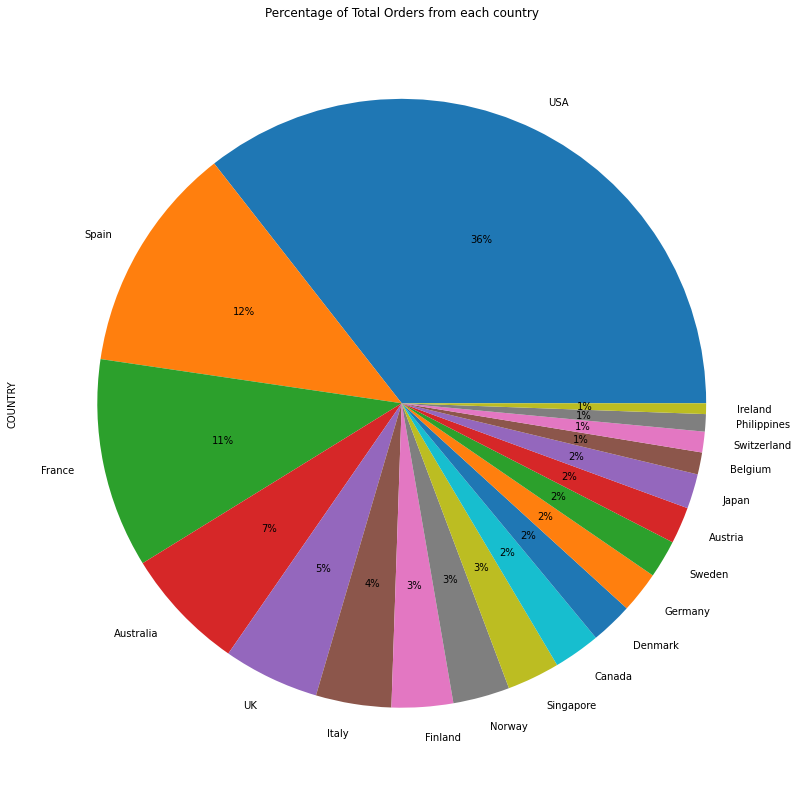

In [28]:
plt.figure(figsize=(28,14))

df['COUNTRY'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')

plt.xticks(color='w')
plt.title("Percentage of Total Orders from each country", color='black')
plt.show()

       Analysis of Dealsize

In [20]:
df['DEALSIZE'].value_counts(normalize=True).to_frame('Percentage of Orders (%)').round(4)*100

,Percentage of Orders (%)
Medium,49.03
Small,45.41
Large,5.56


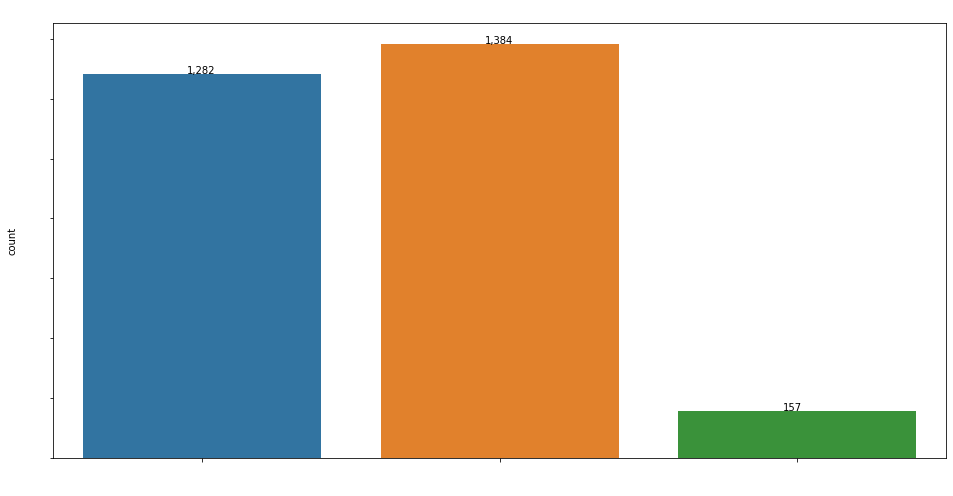

In [29]:
plt.figure(figsize=(16,8))

ax = sns.countplot(data=df, x=df['DEALSIZE'])
for p in ax.patches:
   ax.annotate('{0:,.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1), color='black')

plt.xlabel("Dealsize", color='w')
plt.xticks(color='w')
plt.yticks(color='w')

plt.title("Sales count by dealsize", color='w')
plt.show()


*Average revenue by dealsize:

In [22]:
df[['DEALSIZE', 'SALES']].groupby(['DEALSIZE']).sum().sort_values(by='SALES', ascending=False).style.format('${0:,.2f}')

,SALES
DEALSIZE,
Medium,"$6,087,432.24"
Small,"$2,643,077.35"
Large,"$1,302,119.26"


<Figure size 1152x576 with 0 Axes>

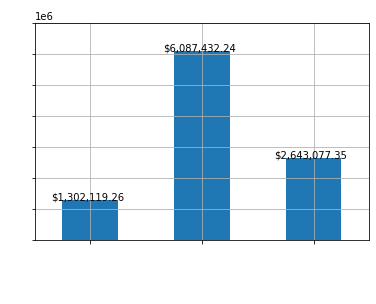

In [23]:
plt.figure(figsize=(16,8))

ax = df[['DEALSIZE', 'SALES']].groupby(['DEALSIZE']).sum().plot(kind='bar')
for p in ax.patches:
   ax.annotate('${0:,.2f}'.format(p.get_height()), (p.get_x()-0.1, p.get_height()+1), color='black')
ax.get_legend().remove()


plt.xticks(color='w', rotation=45)
plt.yticks(color='w')
plt.ylim(0, 7000000)
plt.xlabel("Dealsize", color='w')
plt.ylabel('Revenue', color='w')
plt.title("Average revenue by Dealsize", color='w')

plt.grid()
plt.show()

- Medium sized deals has the highest sales count and brings in the most revenue.

In [24]:
df[['DEALSIZE', 'PRICEEACH']].groupby(['DEALSIZE']).agg(['mean', 'min', 'max']).style.format('${0:,.2f}')

In [25]:
df[['DEALSIZE',	'QUANTITYORDERED']].groupby('DEALSIZE').agg(['mean', 'min', 'max'])

QUANTITYORDERED        
                    mean min max
DEALSIZE                        
Large          47.222930  29  97
Medium         37.947254  20  66
Small          30.525741   6  64

In [26]:
df[['DEALSIZE', 'SALES']].groupby('DEALSIZE').agg(['mean', 'min', 'max']).style.format('${0:,.2f}')

From this analysis, we see that the criteria for categorising the dealsize is based on the revenue from the sale:

- Small = Any sale up to $3,000.
- Medium = $3,000 to $7,000
- Large = Any sale above $7,000